In [23]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

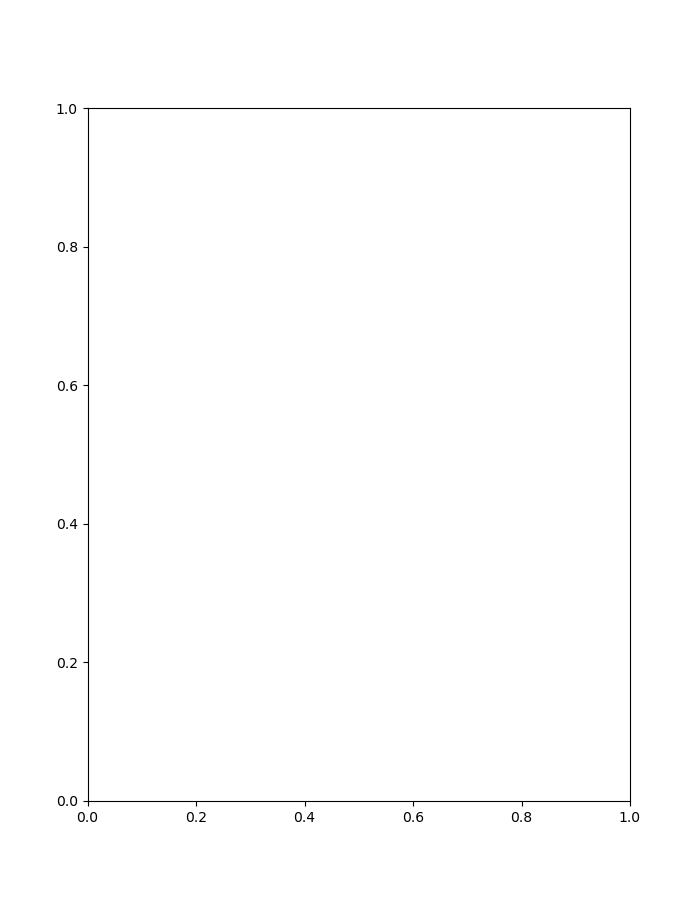

/tmp/ipykernel_335/2194672125.py:22: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=full_data, y="Assay Value", x="Type", alpha = 0.5, palette=["Blue", "Black", "Red"])


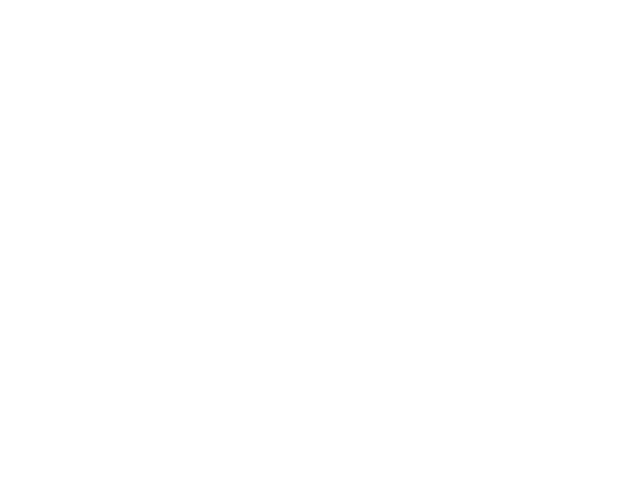

In [24]:
prevalence_data = pd.read_csv("HW4_Q3_data.csv").iloc[:,0].tolist()
positive_controls = pd.read_csv("HW4_Q3_pos.csv").iloc[:,0].tolist()
negative_controls = pd.read_csv("HW4_Q3_neg.csv").iloc[:,0].tolist()

plt.figure(1)
plt.figure(figsize=(7,9))
plt.cla()
plt.show()

full_data = pd.DataFrame(
    {'Type': [],
     'Assay Value': [],
    })

for i in range(len(prevalence_data)):
    full_data.loc[len(full_data.index)] = ["Prevalence Data", prevalence_data[i]]
for i in range(len(positive_controls)):
    full_data.loc[len(full_data.index)] = ["Positive Controls", positive_controls[i]]
for i in range(len(negative_controls)):
    full_data.loc[len(full_data.index)] = ["Negative Controls", negative_controls[i]]

sns.stripplot(data=full_data, y="Assay Value", x="Type", alpha = 0.5, palette=["Blue", "Black", "Red"])

plt.title("Assay Values for Prevalence Study, Positive Controls, Negative Controls")
plt.savefig('Problem3a.png')

In [25]:
def se(c):
    true_positives = 0
    for i in range(len(positive_controls)):
        if c < positive_controls[i]:
            true_positives += 1
    return true_positives / len(positive_controls)
    
    
def sp(c):
    true_negatives = 0
    for i in range(len(negative_controls)):
        if c > negative_controls[i]:
            true_negatives += 1
    return true_negatives / len(negative_controls)
    
def phi_hat(c):
    positive_count = 0
    total_count = len(prevalence_data)
    for i in range(len(prevalence_data)):
        if (prevalence_data[i] > c):
            positive_count += 1
    return positive_count / total_count

def theta_hat(c):
    num = phi_hat(c) - (1 - sp(c))
    denom = se(c) + sp(c) - 1
    if (denom == 0):
        return 0
    return num / denom

def youden_index(c):
    return se(c) + sp(c) - 1


Max Youden Index: 0.9196652157106604
Youden Choice: 14.818181818181818


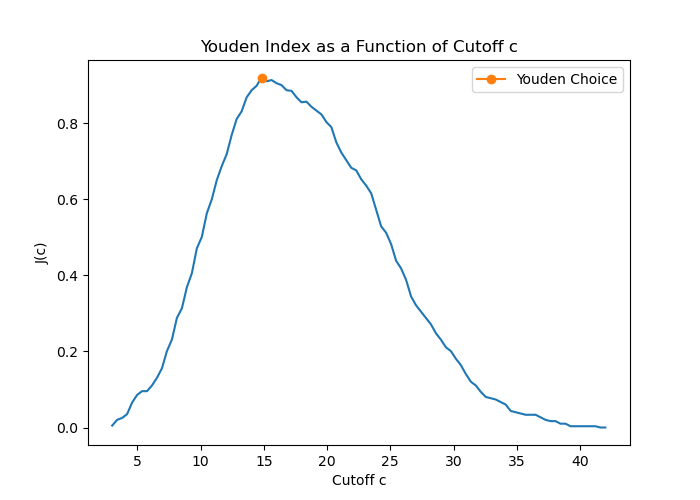

In [26]:
c = np.linspace(3, 42, num=100)
plt.figure(1)
plt.figure(figsize=(7,5))

youden_indices = []
for i in range(len(c)):
    youden_indices.append(youden_index(c[i]))
    
max_youden = max(youden_indices)

max_youden_index = youden_indices.index(max_youden)

best_c = c[max_youden_index]

print("Max Youden Index:", max_youden)
print("Youden Choice:", best_c)

plt.plot(c, youden_indices)
plt.plot(best_c, youden_index(best_c), marker="o", label="Youden Choice")
plt.legend()
plt.xlabel("Cutoff c")
plt.ylabel("J(c)")
plt.title("Youden Index as a Function of Cutoff c")
plt.show()
plt.savefig('Problem3b.png')

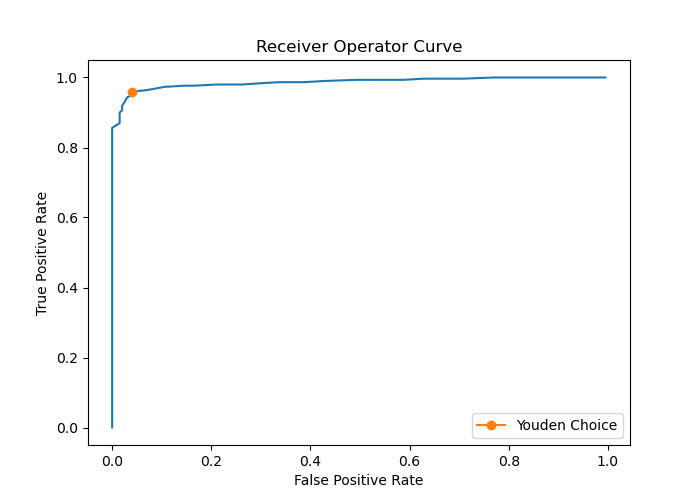

In [27]:
c = np.linspace(3, 42, num=100)
plt.figure(1)
plt.figure(figsize=(7,5))

true_positive_rate = []
false_positive_rate = []

for i in range(len(c)):
    true_positive_rate.append(se(c[i]))
    false_positive_rate.append(1-sp(c[i]))
plt.cla()
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(1-sp(best_c), se(best_c), marker="o", label="Youden Choice")
plt.legend()
plt.title("Receiver Operator Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
plt.savefig('Problem3c.png')

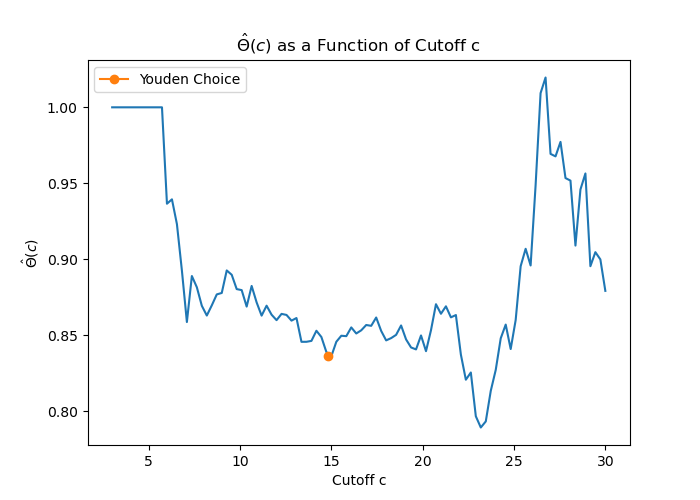

In [28]:
c = np.linspace(3, 30, num=100)
plt.figure(1)
plt.figure(figsize=(7,5))
theta_hat_values = []
for i in range(len(c)):
    theta_hat_values.append(theta_hat(c[i]))
plt.cla()  
plt.plot(c, theta_hat_values)
plt.plot(best_c, theta_hat(best_c), marker="o", label="Youden Choice")
plt.legend()
plt.title("$\hat{\Theta}(c)$ as a Function of Cutoff c")
plt.xlabel("Cutoff c")
plt.ylabel("$\hat{\Theta}(c)$")
plt.show()
plt.savefig('Problem3d.png')